# Problem Statement:
Happy Bank provides various credit cards to customers. The manager of Happy Bank is disturbed by more and more customers leaving their credit card services. The team did a customer survey to check customer attrition. Various customer attributes like Customer_Age, Credit_Limit, Dependent_Count. The team would really appreciate it if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.
                                                                             Dataset Description:
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0(Target)
Customer_Age: Demographic variable - Customer's Age in Years Dependent_Count:Demographic variable - Number of dependents Credit_Limit:Credit Limit on the Credit Card
And so on….
.


<font size =5>1. Importing  Necessary Libraries.</font>

In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Reading a datagrame   

data =pd.read_csv("D:\BankChurners.csv")


<font size =5>2. Display a sample of five rows of the data frame..</font>

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<font size =5>3. Check the shape of the data (number of rows and columns)</font>

In [4]:
data.shape

(10127, 21)

In [5]:
# for accessing all the columns of dataframe

data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<font size =5>4.Check the percentage of missing values in each column of the data frame </font>

In [6]:
pd.isnull(data).sum()/len(data)*100

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

<font size =5> 5.Check if there are any duplicate rows.</font>

In [7]:
data.duplicated().sum()

0

<font size =5> 6.Check the distribution of the Customer_Age column. Check the basic statistics like mean, median, and standard deviation of  the age column.</font>

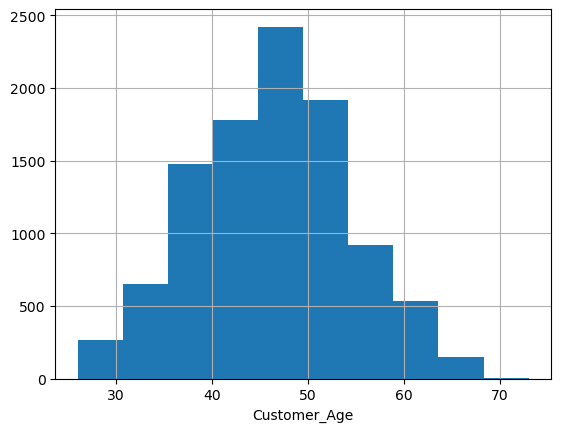

In [8]:
# for check the distribution of Age column
data["Customer_Age"].hist()
# Set the x-axis label
plt.xlabel('Customer_Age')
plt.show()

In [9]:
# for calculate mean 
mean_data = data['Customer_Age'].mean()

# for calculate mode
mode_data = data['Customer_Age'].mode()

# for calculate median
median_data =data['Customer_Age'].median()

## for calculate Standard Deviation
std_data =data['Customer_Age'].std(ddof=0)

print("Mean :", mean_data)
print("Median :", median_data)
print("Mode :", mode_data)
print(" Standard Deviation :", std_data )


Mean : 46.32596030413745
Median : 46.0
Mode : 0    44
Name: Customer_Age, dtype: int64
 Standard Deviation : 8.016418208911816


In [10]:
#............ using describe fnction
data['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

<font size =5>7.) Plot 2 box plots and 2 pie chart of the parameter of your on choice and write your intuition about i</font>

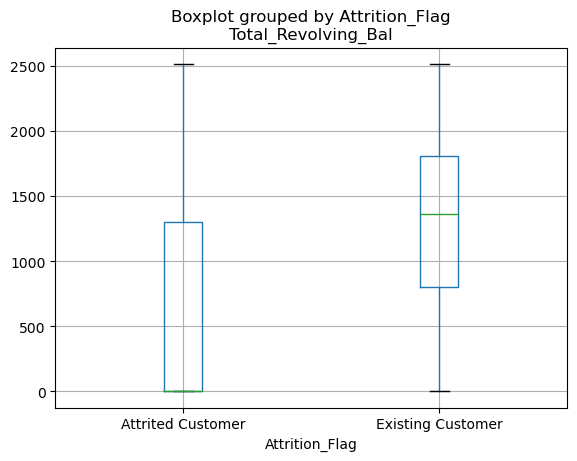

In [11]:
data.boxplot(column=['Total_Revolving_Bal'], by='Attrition_Flag')
plt.show()
 

# Intuition: Attrited customers have lower number of transactions than existing customers

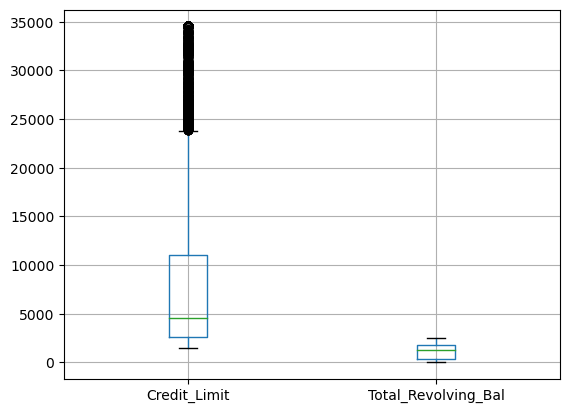

In [12]:
data.boxplot(column=['Credit_Limit', 'Total_Revolving_Bal'])
plt.show()



<Axes: ylabel='Education_Level'>

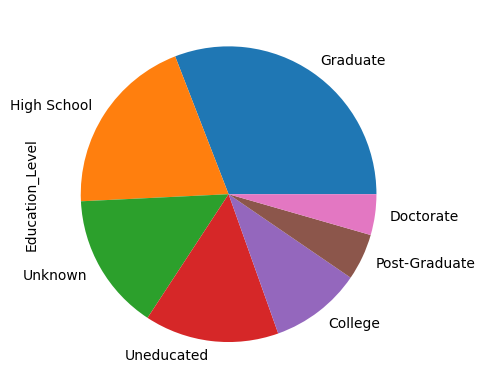

In [13]:
data["Education_Level"].value_counts().plot.pie()

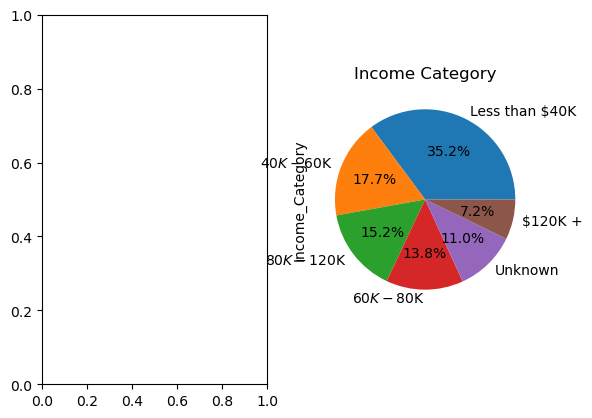

In [14]:
fig, axes = plt.subplots(1, 2)
data['Income_Category'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Income Category')
plt.show()

<font size =5>8.Plot a Box-plot of Total_Revolving_Bal and Card_Category by characterizing with Attrition_Flag. Write your intuitions about it. </font>

Text(0, 0.5, 'Total Revolving Balance')

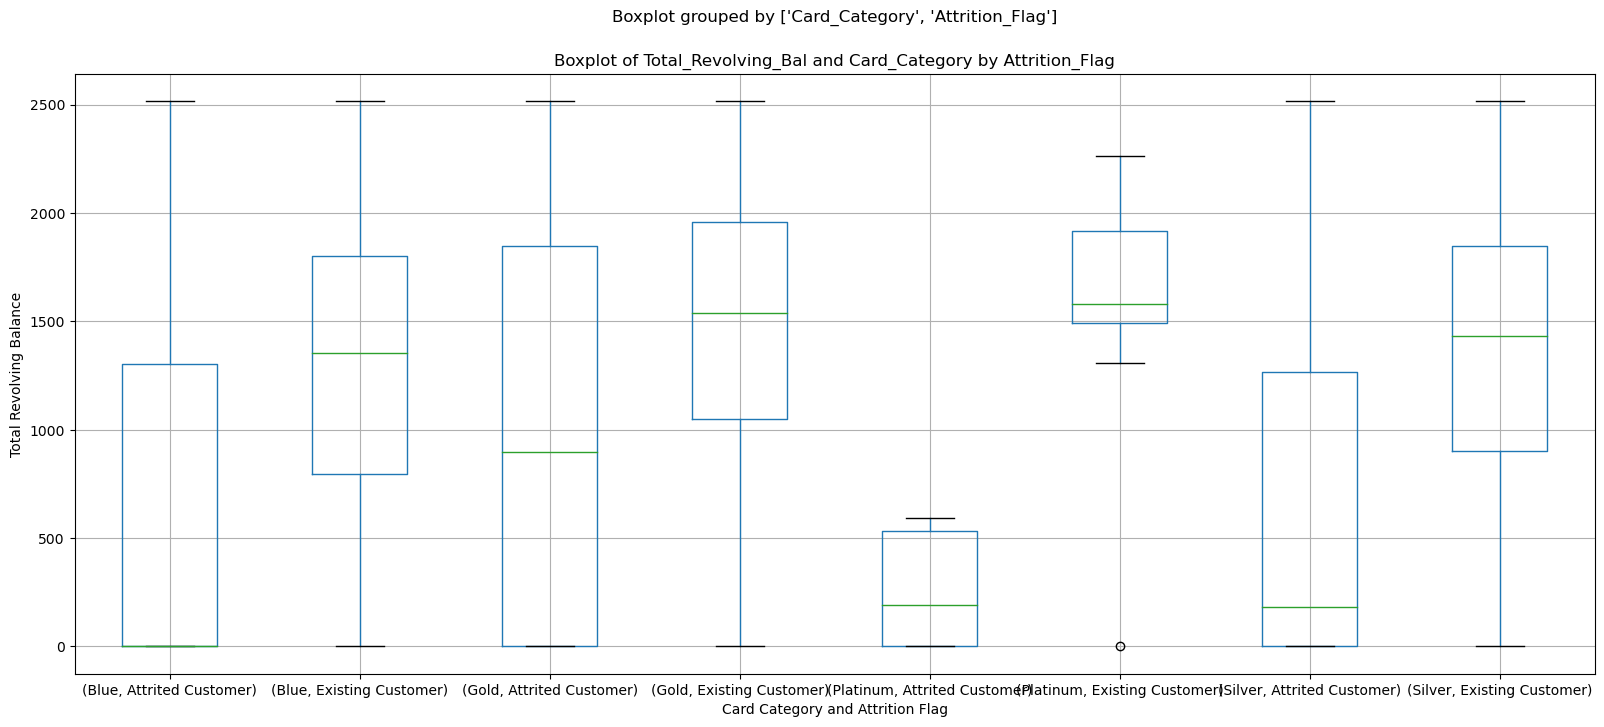

In [15]:
# Create a boxplot of Total_Revolving_Bal and Card_Category by characterizing with Attrition_Flag
data.boxplot(column=['Total_Revolving_Bal'], by=['Card_Category', 'Attrition_Flag'], figsize=(19, 8))

# Set the title of the plot
plt.title('Boxplot of Total_Revolving_Bal and Card_Category by Attrition_Flag')

# Set the x-axis label
plt.xlabel('Card Category and Attrition Flag')

# Set the y-axis label
plt.ylabel('Total Revolving Balance')

# Insights :
Here with the help of our code we creates a boxplot of Total_Revolving_Bal and Card_Category by characterizing with Attrition_Flag. The by parameter is used to group the data by Card_Category and Attrition_Flag. The boxplot shows the distribution of Total_Revolving_Bal for each combination of Card_Category and Attrition_Flag.

The boxplot can be used to identify any differences in the distribution of Total_Revolving_Bal between different categories of credit cards and between customers who have churned and those who have not. For example, if there is a significant difference in the median value of Total_Revolving_Bal between customers who have churned and those who have not, this could indicate that this feature is an important predictor of customer churn.

<font size =5>9.Plot a percentage segment bar graph between Education_Level and Attrition_Flag of the customers </font>

<Axes: xlabel='Education_Level', ylabel='percent'>

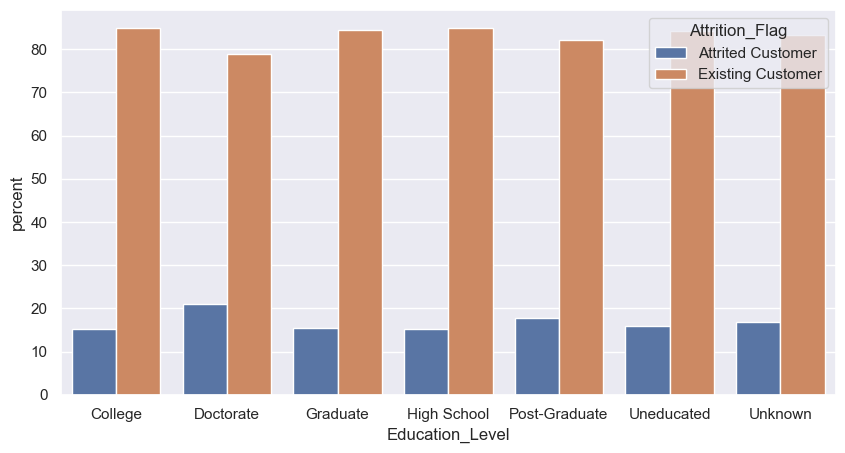

In [16]:
# calcuclate the percentage of each category
data = data.groupby(["Education_Level", "Attrition_Flag"])["Attrition_Flag"].count().reset_index(name="count")
data["percent"] = 100 * data["count"] / data.groupby("Education_Level")["count"].transform("sum")

# Set the figure size
sns.set(rc={"figure.figsize": (10, 5)})

# Plot the bar chart
sns.barplot(x="Education_Level", y="percent", hue="Attrition_Flag", data=data)


<font size =5>10.Plot a percentage segment bar graph between Income_Category and Attrition_Flag of the customers </font>

<Axes: xlabel='Income_Category', ylabel='percent'>

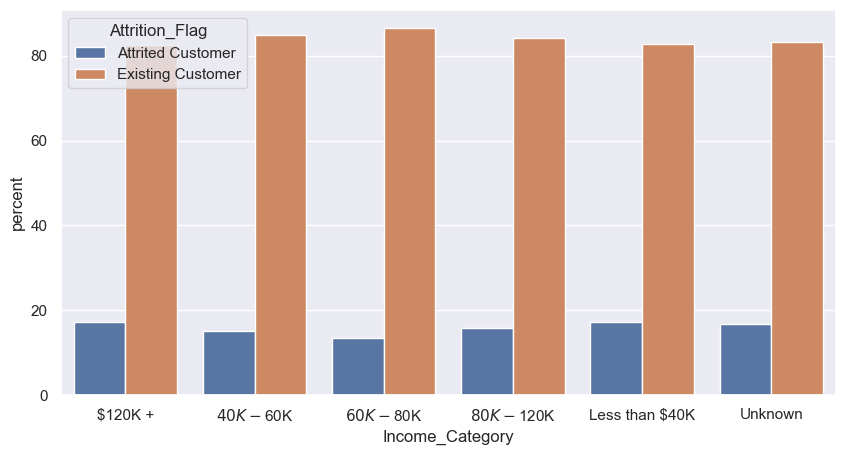

In [17]:
data =pd.read_csv("BankChurners.csv")

# Compute the percentage of each category

data = data.groupby(["Income_Category", "Attrition_Flag"])["Attrition_Flag"].count().reset_index(name="count")
data["percent"] = 100 * data["count"] / data.groupby("Income_Category")["count"].transform("sum")

# Set the figure size
sns.set(rc={"figure.figsize": (10, 5)})

# Plot the bar chart
sns.barplot(x="Income_Category", y="percent", hue="Attrition_Flag", data=data)

<font size =5>11.Drop CLIENTNUM column.Make a sub data frame which consists of all the numerical columns(i.e.int64,float64) along with the Attrition_Flag column. Plot a clear heatmap to view the correlation using seaborn. </font>

C:\Users\HP\AppData\Local\Temp\ipykernel_1296\1017820608.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm")


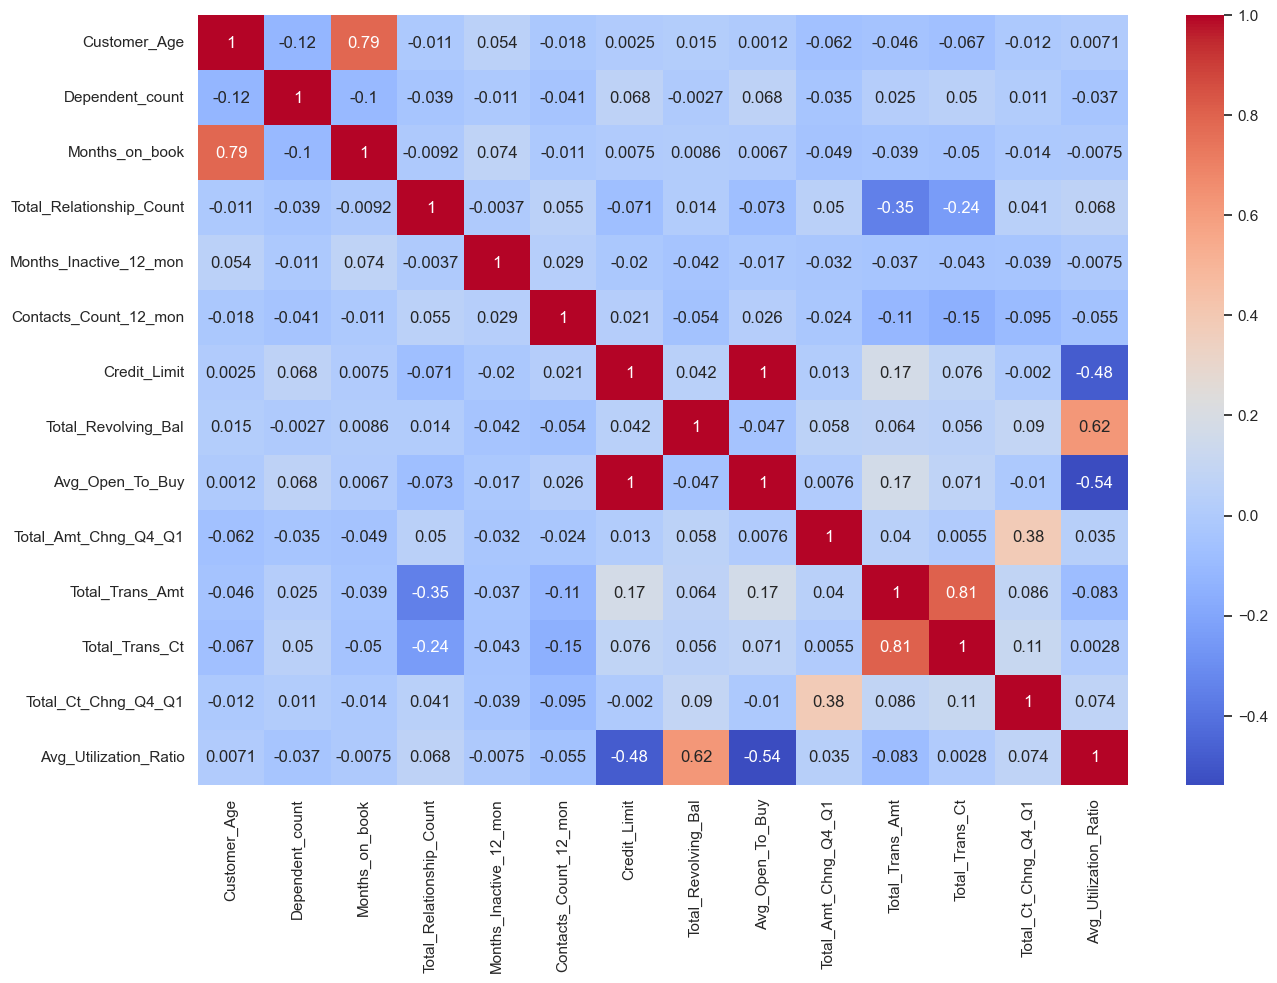

In [18]:
data =pd.read_csv("BankChurners.csv")

data = data.drop(["CLIENTNUM"], axis=1) # Drop the customer ID column
num_data = data.select_dtypes(include=["int64", "float64"]) # Select only numerical columns
num_data["Attrition_Flag"] = data["Attrition_Flag"] # Add the target column
plt.figure(figsize=(15,10))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm")
plt.show()

<font size =5>12.Plot a boxplot for the Credit_Limit column and check if it contains any outlier or not</font>

{'whiskers': [<matplotlib.lines.Line2D at 0x15e52420510>,
 'caps': [<matplotlib.lines.Line2D at 0x15e52421890>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e521c6250>],
 'medians': [<matplotlib.lines.Line2D at 0x15e52422a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15e52423210>],
 'means': []}

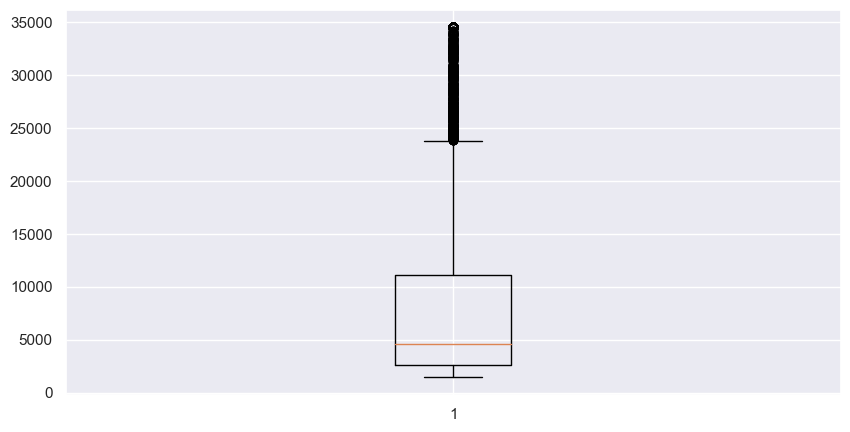

In [19]:
plt.boxplot(data =  data , x='Credit_Limit')
 

<font size =5>13.	Map the Attrition_Flag values to 0 and 1(i.e. Existing Customer=0 and Attrited Customer=1. Standardize the columns.</font>

In [20]:
data =pd.read_csv("BankChurners.csv")

# mapping the Attrituion Flag column according to 0s,1s
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0,'Attrited Customer':1}) 

#selecting numerical coulumns for standardiztaions
numerical_columns = data.select_dtypes(include = ['int64', 'float64'])

#calculating mean and std for standardizations
mean_data = numerical_columns.mean()
std_data = numerical_columns.std()

#standardizing the numerical columns
standardized_columns = (numerical_columns - mean_data)/std_data


data[numerical_columns.columns] = standardized_columns

In [21]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.802838,-0.437485,-0.165397,M,0.503343,High School,Married,$60K - $80K,Blue,0.384602,...,-1.327071,0.492379,0.446600,-0.473399,0.488947,2.623365,-0.959659,-0.973847,3.833813,-0.775844
1,2.156755,-0.437485,0.333554,F,2.043098,Graduate,Single,Less than $40K,Blue,1.010665,...,-1.327071,-0.411596,-0.041365,-0.366649,-0.008486,3.563117,-0.916387,-1.357273,12.607950,-0.616245
2,-0.682735,-0.437485,0.583030,M,0.503343,Graduate,Married,$80K - $120K,Blue,0.008964,...,-1.327071,-2.219546,-0.573669,-1.426788,-0.445636,8.366801,-0.740945,-1.911111,6.807528,-0.997106
3,0.832821,-0.437485,-0.789087,F,1.273221,High School,Unknown,Less than $40K,Blue,-0.241461,...,1.641397,-1.315571,-0.585222,1.661604,-0.734063,2.942698,-0.951711,-1.911111,6.807528,1.759599
4,-0.814855,-0.437485,-0.789087,M,0.503343,Uneducated,Married,$60K - $80K,Blue,-1.869225,...,-1.327071,-2.219546,-0.430856,-1.426788,-0.302853,6.455363,-1.056211,-1.570288,7.508954,-0.997106
5,-0.707679,-0.437485,-0.290135,M,-0.266534,Graduate,Married,$40K - $60K,Blue,0.008964,...,-1.327071,-0.411596,-0.508534,0.103297,-0.517688,2.810403,-0.976144,-1.740700,0.561888,0.130967
6,1.928518,-0.437485,0.583030,M,1.273221,Unknown,Married,$120K +,Gold,1.261090,...,-1.327071,0.492379,2.847913,1.351169,2.726182,5.542983,-0.904907,-1.442479,0.041068,-0.757708
7,2.160445,-0.437485,-1.786989,M,-1.806289,High School,Unknown,$60K - $80K,Silver,-1.117949,...,-0.337581,-0.411596,2.249923,0.286122,2.223799,6.587659,-0.843679,-1.229465,0.007466,-0.822998
8,-0.765426,-0.437485,-1.163300,M,0.503343,Uneducated,Single,$60K - $80K,Blue,0.008964,...,-0.337581,-2.219546,1.509559,1.661604,1.360278,11.838409,-0.899020,-1.740700,1.973142,-0.587227
9,-0.528836,-0.437485,0.208816,M,-0.266534,Graduate,Single,$80K - $120K,Blue,0.008964,...,0.651908,0.492379,0.332723,0.630913,0.276091,3.485565,-0.872232,-1.399876,0.713093,-0.474783


In [22]:
 data.describe(include = 'all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,10127,1.012700e+04,10127,10127,10127,10127,1.012700e+04,...,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
unique,NaN,NaN,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-6.356786e-16,-3.087181e-17,1.445362e-16,NaN,-7.296973e-17,NaN,NaN,NaN,NaN,-3.578323e-16,...,1.754080e-16,-6.735667e-17,1.010350e-16,-6.174362e-17,4.490445e-17,3.732682e-16,-4.490445e-17,-2.245222e-16,-3.213475e-16,-8.419584e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.426107e-01,-4.374847e-01,-2.535416e+00,NaN,-1.806289e+00,NaN,NaN,NaN,NaN,-2.870926e+00,...,-2.316560e+00,-2.219546e+00,-7.914876e-01,-1.426788e+00,-8.212956e-01,-3.466775e+00,-1.146287e+00,-2.337140e+00,-2.991449e+00,-9.971058e-01
25%,-7.083511e-01,-4.374847e-01,-6.643487e-01,NaN,-1.036411e+00,NaN,NaN,NaN,NaN,-6.170990e-01,...,-3.375813e-01,-4.115957e-01,-6.686217e-01,-9.862902e-01,-6.759270e-01,-5.882147e-01,-6.619078e-01,-8.460383e-01,-5.469550e-01,-9.136792e-01
50%,-5.758555e-01,-4.374847e-01,-4.065958e-02,NaN,-2.665340e-01,NaN,NaN,NaN,NaN,8.964070e-03,...,-3.375813e-01,-4.115957e-01,-4.492303e-01,1.388806e-01,-4.394762e-01,-1.092149e-01,-1.486803e-01,9.122586e-02,-4.293563e-02,-3.587110e-01
75%,9.203914e-01,-4.374847e-01,7.077674e-01,NaN,5.033433e-01,NaN,NaN,NaN,NaN,5.098145e-01,...,6.519080e-01,4.923795e-01,2.679730e-01,7.622032e-01,2.628911e-01,4.518991e-01,9.917600e-02,6.876667e-01,4.442831e-01,8.273976e-01
